# Superbowl History

### Context
The Superbowl is an annual American football game that determines the champion of the National Football League (NFL). The game culminates a season that begins in the previous calendar year, and is the conclusion of the NFL playoffs. The contest is held in an American City, chosen three to four years beforehand, usually at warm-weather sites or domed stadiums. Since January 1971, the winner of the American Football Conference (AFC) Championship Game has faced the winner of the National Football Conference (NFC) Championship Game in the culmination of the NFL playoffs. 

### Content
This dataset contains data about the Superbowl finals from 1967 to 2020. It's simple and straightforward, one row per Superbowl. 

### Acknowledgements
Data from https://www.pro-football-reference.com/super-bowl

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning
***
- Dropping columns that provide ancillary information that are not very descriptive of the Superbowls themselves: '<font face="Trebuchet MS" color=CadetBlue>SB</font>', '<font face="Trebuchet MS" color=CadetBlue>MVP</font>' and '<font face="Trebuchet MS" color=CadetBlue>Stadium</font>'
- Changing the Index to '<font face="Trebuchet MS" color=CadetBlue>Date</font>'
- Renaming some columns

In [4]:
df = pd.read_csv('superbowl.csv')
df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [5]:
to_drop = ['MVP', 'SB', 'Stadium']
df.drop(to_drop, inplace=True, axis=1)
df.head()

,Date,Winner,Winner Pts,Loser,Loser Pts,City,State
0,Feb 2 2020,Kansas City Chiefs,31,San Francisco 49ers,20,Miami Gardens,Florida
1,Feb 3 2019,New England Patriots,13,Los Angeles Rams,3,Atlanta,Georgia
2,Feb 4 2018,Philadelphia Eagles,41,New England Patriots,33,Minneapolis,Minnesota
3,Feb 5 2017,New England Patriots,34,Atlanta Falcons,28,Houston,Texas
4,Feb 7 2016,Denver Broncos,24,Carolina Panthers,10,Santa Clara,California


In [6]:
df['Date'].is_unique

True

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Winner,Winner Pts,Loser,Loser Pts,City,State
Date,,,,,,
2020-02-02,Kansas City Chiefs,31,San Francisco 49ers,20,Miami Gardens,Florida
2019-02-03,New England Patriots,13,Los Angeles Rams,3,Atlanta,Georgia
2018-02-04,Philadelphia Eagles,41,New England Patriots,33,Minneapolis,Minnesota
2017-02-05,New England Patriots,34,Atlanta Falcons,28,Houston,Texas
2016-02-07,Denver Broncos,24,Carolina Panthers,10,Santa Clara,California


In [8]:
df.get_dtype_counts()

int64     2
object    4
dtype: int64

In [9]:
df.isnull().sum()

Winner        0
Winner Pts    0
Loser         0
Loser Pts     0
City          0
State         0
dtype: int64

In [10]:
new_names = {'Winner': 'Winning_Team',
             'Winner Pts': 'Winning_Pts',
             'Loser': 'Losing_Team',
             'Loser Pts': 'Losing_Pts'}
df.rename(columns=new_names, inplace=True)
df.head()

,Winning_Team,Winning_Pts,Losing_Team,Losing_Pts,City,State
Date,,,,,,
2020-02-02,Kansas City Chiefs,31,San Francisco 49ers,20,Miami Gardens,Florida
2019-02-03,New England Patriots,13,Los Angeles Rams,3,Atlanta,Georgia
2018-02-04,Philadelphia Eagles,41,New England Patriots,33,Minneapolis,Minnesota
2017-02-05,New England Patriots,34,Atlanta Falcons,28,Houston,Texas
2016-02-07,Denver Broncos,24,Carolina Panthers,10,Santa Clara,California


In [11]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Winning_Team,Winning_Pts,Losing_Team,Losing_Pts,City,State
Date,,,,,,


## Exploratory Analysis
***

In [12]:
df.describe(include='all')

,Winning_Team,Winning_Pts,Losing_Team,Losing_Pts,City,State
count,54,54.000000,54,54.000000,54,54
unique,22,NaN,26,NaN,20,10
top,Pittsburgh Steelers,NaN,Denver Broncos,NaN,New Orleans,Florida
freq,6,NaN,5,NaN,10,16
mean,NaN,30.111111,NaN,16.203704,NaN,NaN
std,NaN,9.766455,NaN,7.413348,NaN,NaN
min,NaN,13.000000,NaN,3.000000,NaN,NaN
25%,NaN,23.250000,NaN,10.000000,NaN,NaN
50%,NaN,30.500000,NaN,17.000000,NaN,NaN
75%,NaN,35.000000,NaN,21.000000,NaN,NaN


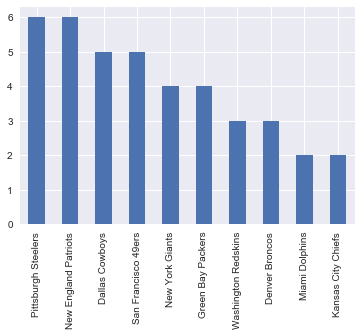

In [13]:
df['Winning_Team'].value_counts().head(10).plot(kind='bar')

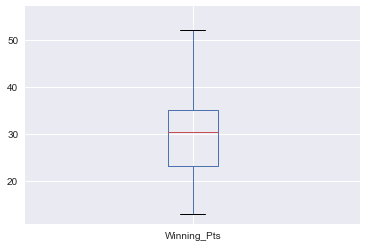

In [14]:
df['Winning_Pts'].plot(kind='box')

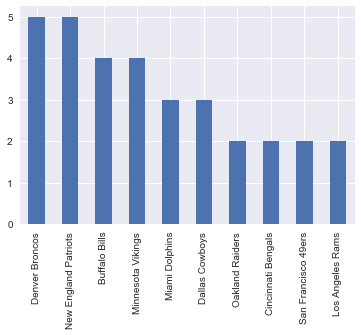

In [15]:
df['Losing_Team'].value_counts().head(10).plot('bar')

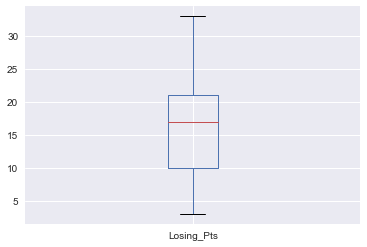

In [92]:
df['Losing_Pts'].plot(kind='box')

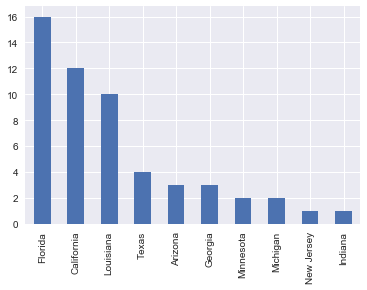

In [17]:
df['State'].value_counts().head(10).plot('bar')

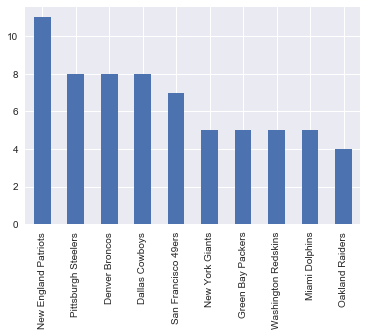

In [20]:
# What teams have been to the SB the most, regardless if they won or lost?
df['Winning_Team'].append(df['Losing_Team']).value_counts().head(10).plot('bar')

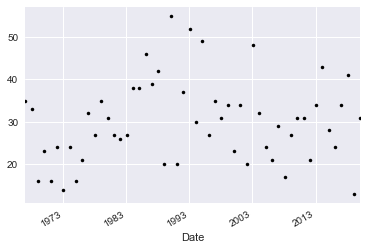

In [27]:
df['Winning_Pts'].plot(style='k.')

No clear association between the winning teams points and when the Superbowl took place. 

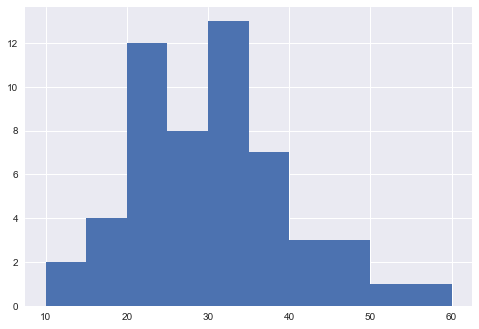

In [44]:
bin_edges = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
df['Winning_Pts'].hist(bins=bin_edges)

There were 48 of 54 (89%) teams that won with 20 or more points.

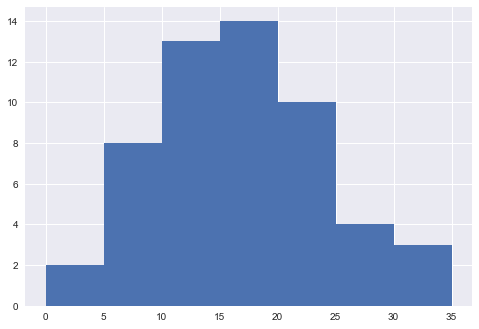

In [46]:
bin_edges = [0, 5, 10, 15, 20, 25, 30, 35]
df['Losing_Pts'].hist(bins=bin_edges)

There were 47 of 54 (87%) teams that lost with 25 or less points. 